In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
import matplotlib.pyplot as plt




In [2]:
data=pd.read_csv("Ecommerce Customers.csv")

In [3]:
data.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
features=["Avg. Session Length","Time on App","Time on Website","Length of Membership"]

Xfeatures=data[features]

Label=["Yearly Amount Spent"]
Ylabel=data[Label]





In [5]:
X_train, X_test, y_train, y_test = train_test_split(Xfeatures, Ylabel, test_size=0.20, random_state=42)

## standardaztion for feature scaling

In [6]:
std=X_train.std()
mean=X_train.mean()

In [7]:
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std


In [8]:
##Adding X0 as 1 for intercept

X_train=X_train.assign(x0=1)
X_train=X_train[["x0"]+features]

X_test=X_test.assign(x0=1)
X_test=X_test[["x0"]+features]




## Initialization of theta or coefficients 

In [9]:
randomlist=np.random.rand(1,5)

theta=pd.DataFrame(randomlist,columns=X_train.columns)


In [10]:
theta

,x0,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.437641,0.762639,0.748009,0.834275,0.942454


## Training the linear regression model

In [11]:
training_size=len(X_train)
Iteration_number=500
No_Batches=50
alpha=0.00076 ## learning rate 


In [12]:
## creating 50 small batches to train our model
kf = KFold(n_splits=No_Batches, random_state=None) 


In [13]:
for i in range(Iteration_number):
    batch_diff=0

    for rest_data,batch in kf.split(X_train):

        X_batch=X_train.iloc[batch]
        Y_batch=y_train.iloc[batch]

        n=len(X_batch)

        """
        Step1 :- get htheta which is the predicted values for current theta set
        """
        htheta=X_batch.dot(theta.T).rename(columns={0:Y_batch.columns[0]})  ## to do matrix multiplication column names of the matrix should be same

        
        """
        Step2 :- Get the gadient and multiply learning rate (alpha).
                as we know gradient= sum( i= 0 to n)(htheta(i)-y(i)x(i))
                here dot product will take care of sum and we get gardient as an matrix with 
                length = number of features corresponding to gradient for each feature
                
        """
        diff=htheta-Y_batch


        gradient=(alpha/n)*diff.T.dot(X_batch)


        """
        step 3:- update the theta simultaneously 
        """
    
        theta=theta-gradient.set_index(theta.index)

 

        batch_diff+=(diff.abs().sum()).iloc[0]  ## Sum of all the diff of batches in each iteration 
        
        
    if i%50==0:
        print("At interation:-",i+1)
        print("Mean absolute error is :-",batch_diff/training_size)
            
    


At interation:- 1
Mean absolute error is :- 492.42041960851924
At interation:- 51
Mean absolute error is :- 73.57325499712215
At interation:- 101
Mean absolute error is :- 12.372961457613494
At interation:- 151
Mean absolute error is :- 7.819387848452554
At interation:- 201
Mean absolute error is :- 7.72888386760314
At interation:- 251
Mean absolute error is :- 7.728779953268799
At interation:- 301
Mean absolute error is :- 7.7289122569125706
At interation:- 351
Mean absolute error is :- 7.728930848444838
At interation:- 401
Mean absolute error is :- 7.7289334691755744
At interation:- 451
Mean absolute error is :- 7.728933840012331


In [14]:
theta

,x0,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,502.001027,25.287354,38.744047,0.319824,63.613604


## Testing accuracy on test data

In [15]:
predicted=X_test.dot(theta.T).rename(columns={0:X_test.columns[0]})

In [16]:
diff=predicted.T-(y_test.T).set_index(predicted.T.index)

In [17]:
diff

,361,73,374,155,104,394,377,124,68,450,...,381,472,362,324,431,347,86,75,438,15
x0,1.855344,7.755062,8.031016,-2.06361,-0.389357,12.307702,-7.4197,-8.382731,-0.495368,-1.538497,...,-10.964136,30.145318,-8.415417,14.422355,4.128955,-4.819947,-2.179747,-22.776037,5.706751,-10.081615


In [18]:
mean_absolute_error=(diff.abs()).sum(axis=1)/100

print("Mean absolute error in test data is :-",mean_absolute_error.iloc[0])

mean_squared_error=(diff**2).sum(axis=1)/100

print("Mean squared error in test data is :-",mean_squared_error.iloc[0])


Mean absolute error in test data is :- 8.556858871054203
Mean squared error in test data is :- 109.83105033625121


In [19]:
predicted.head(10)

,x0
361,402.888479
73,542.532250
374,426.633758
155,501.914769
104,409.680254
394,569.915964
377,531.522274
124,505.953828
68,408.124820
450,473.476910


In [20]:
y_test.head(10)

,Yearly Amount Spent
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611
394,557.608262
377,538.941975
124,514.336558
68,408.620188
450,475.015407


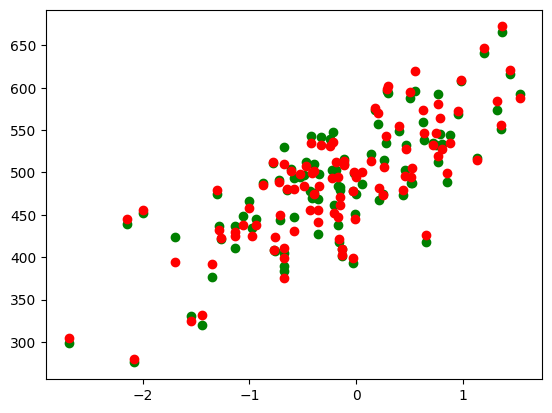

In [21]:
plt.scatter(X_test["Length of Membership"], y_test,color='g')
plt.scatter(X_test["Length of Membership"], predicted,color='r')
plt.show()